In [1]:
!pip install git+https://github.com/zclaytor/prot

  Cloning https://github.com/zclaytor/prot to /tmp/pip-req-build-q0zv_6ay
  Running command git clone --filter=blob:none --quiet https://github.com/zclaytor/prot /tmp/pip-req-build-q0zv_6ay
  Resolved https://github.com/zclaytor/prot to commit 8aaf3b570f9d2e5f451e53c1ae9899c36e5531f7
  Preparing metadata (setup.py) ... done
  Created wheel for prot: filename=prot-0.2.0-py3-none-any.whl size=6158 sha256=464f87ff9df629ee4d1dfa50a90dc57d0cea06fe58bf0ff5da6aafafb92de804
  Stored in directory: /tmp/pip-ephem-wheel-cache-f331r9f7/wheels/33/fa/49/f8cda5982dea3e829443326b143b7f4ec122301312ddd5ce73
Successfully built prot


In [2]:
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits
import lightkurve as lk

from prot import WaveletTransform as WT

In [3]:
data = pd.read_csv("runs/classes_0/test_predictions.csv", index_col=[0, 1])
d = data.iloc[[4, 0, 3, 92]]
d.round(1)

,,filename,ebs_true,exo_true,flares_true,rot_true,ebs_pred,exo_pred,flares_pred,rot_pred
TIC,sector,,,,,,,,,
238123653,7,tess2019006130736-s0007-0000000238123653-0131-...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
366972961,25,tess2020133194932-s0025-0000000366972961-0182-...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
237913194,28,tess2020212050318-s0028-0000000237913194-0190-...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
200668936,2,tess2018234235059-s0002-0000000200668936-0121-...,0.0,0.0,1.0,0.0,0.0,0.0,0.9,0.1


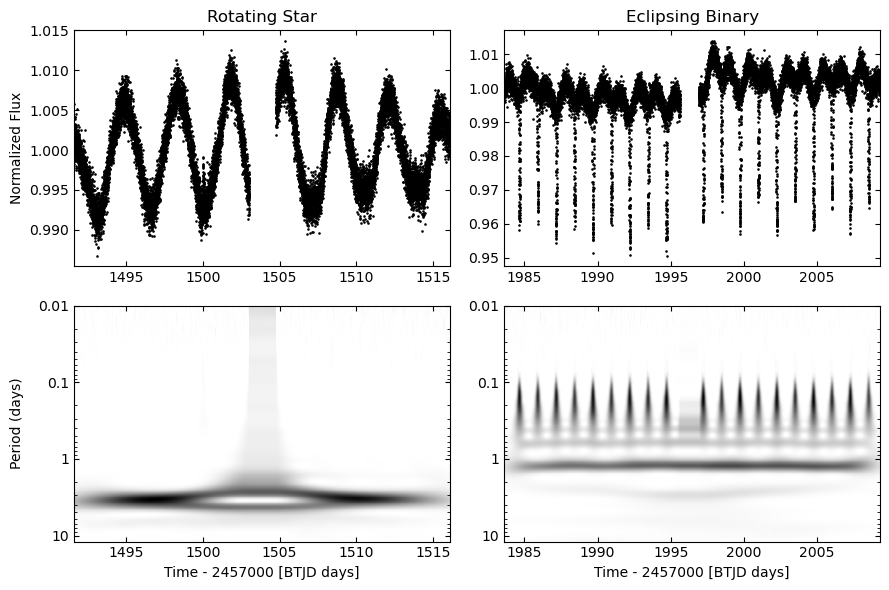

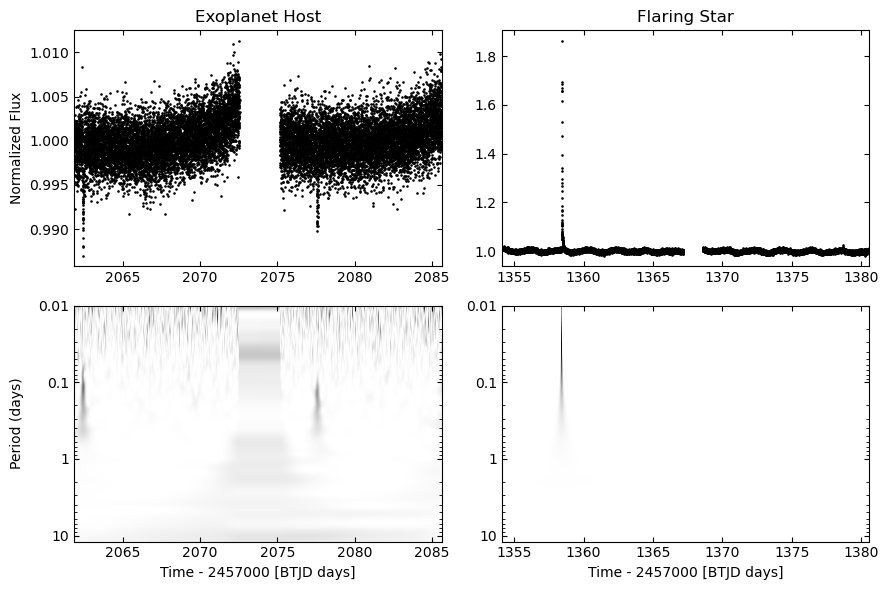

In [10]:
output_dim = 64

plt.close("all")

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
ax = axs.flatten()
i1 = [0, 1]#, 4, 5]
i2 = [2, 3]#, 6, 7]
titles = ["Rotating Star", "Eclipsing Binary"]

for i, row in d.reset_index().iloc[[0, 1]].iterrows():
    fname = row["filename"].replace("_wt.npy", "")
    fpath = os.path.join("mastDownload/TESS", fname, fname+"_lc.fits")

    ax1 = ax[i1[i]]
    ax2 = ax[i2[i]]
    
    with fits.open(fpath, "readonly") as hdulist:
        # read light curve data
        data = hdulist[1].data
        time = data["TIME"]

        # filter out NaNs
        finite = np.isfinite(time)
        time = time[finite]
        data = data[finite]

        # convert to lightkurve object
        lc = lk.TessLightCurve(data, time=time).select_flux("SAP_FLUX")
        lc = lc[lc["QUALITY"] == 0]
        lc.normalize().scatter(ax=ax1, c="k", s=3, rasterized=True)
        
        # compute wavelet transform
        wt = WT.from_lightcurve(lc, minimum_period=0.01, maximum_period=12)
        wt.plot(ax=ax2, plot_coi=False, rasterized=True)
        ax1.set_xlim(ax2.get_xlim())

        ax1.tick_params(direction="in", which="both", top=True, right=True)
        ax2.tick_params(direction="in", which="both", top=True, right=True)

        ax1.set_xlabel("")
        ax1.set_title(titles[i])
        
        if i%2 != 0:
            ax1.set_ylabel("")
            ax2.set_ylabel("")

fig.align_labels()
fig.tight_layout()
plt.savefig("lcs1.png", dpi=300)

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
ax = axs.flatten()
i1 = [0, 1]
i2 = [2, 3]
titles = ["Exoplanet Host", "Flaring Star"]

for i, row in d.reset_index().iloc[[2, 3]].iterrows():
    fname = row["filename"].replace("_wt.npy", "")
    fpath = os.path.join("mastDownload/TESS", fname, fname+"_lc.fits")

    ax1 = ax[i1[i-2]]
    ax2 = ax[i2[i-2]]
    
    with fits.open(fpath, "readonly") as hdulist:
        # read light curve data
        data = hdulist[1].data
        time = data["TIME"]

        # filter out NaNs
        finite = np.isfinite(time)
        time = time[finite]
        data = data[finite]

        # convert to lightkurve object
        lc = lk.TessLightCurve(data, time=time).select_flux("SAP_FLUX")
        lc = lc[lc["QUALITY"] == 0]
        lc.normalize().scatter(ax=ax1, c="k", s=3, rasterized=True)
        
        # compute wavelet transform
        wt = WT.from_lightcurve(lc, minimum_period=0.01, maximum_period=12)
        wt.plot(ax=ax2, plot_coi=False, rasterized=True)
        ax1.set_xlim(ax2.get_xlim())

        ax1.tick_params(direction="in", which="both", top=True, right=True)
        ax2.tick_params(direction="in", which="both", top=True, right=True)

        ax1.set_xlabel("")
        ax1.set_title(titles[i-2])
        
        if i%2 != 0:
            ax1.set_ylabel("")
            ax2.set_ylabel("")

fig.align_labels()
fig.tight_layout()
plt.savefig("lcs2.png", dpi=300)